# Player Analysis

In [461]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


%matplotlib inline

## Data Cleaning and Exploration

In [462]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [463]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [464]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','dl_applied','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs','penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 26)

In [465]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,2,0,0,0,0,0,2,2,NaN,NaN


## Taking in consideration only KKR VS RR matches

In [466]:
RR_KKR = matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Rajasthan Royals'),
                            np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Rajasthan Royals'))]

In [467]:
RR_KKR.match_id.nunique()

20

In [468]:
RR_KKR.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

## Wickets to fall in total in the match

In [469]:
wicket = pd.DataFrame(RR_KKR.groupby(['match_id'])["player_dismissed"].count())

wicket.columns = ["wickets"]

print("Wickets :")

wicket

Wickets :


,wickets
match_id,
78,17
105,12
126,15
168,15
187,12
227,11
246,5
251,12
314,15


In [470]:
wicket.describe().T

,count,mean,std,min,25%,50%,75%,max
wickets,20.0,12.2,3.334035,5.0,11.0,12.0,15.0,17.0


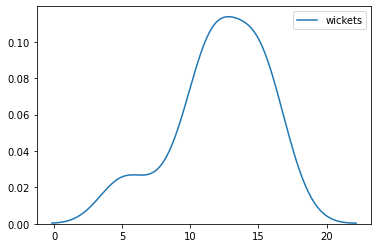

In [471]:
sns.kdeplot(wicket['wickets'])

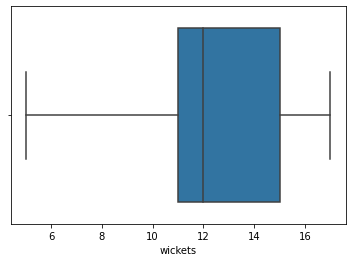

In [472]:
sns.boxplot(wicket['wickets'])

In [473]:
print("Average wicket fall in KKR VS RR matches  :{}".format(round(wicket["wickets"].mean())))

Average wicket fall in KKR VS RR matches  :12


### Inning Wise

- 1st innings

In [474]:
first = RR_KKR[RR_KKR["inning"]==1]

In [475]:
first_innings = pd.DataFrame(first.groupby(["match_id","batting_team"])["player_dismissed"].count())

first_innings.columns =["1st innings wickets"]

first_innings.reset_index(inplace = True)

print("1st inning wicket fall :")
first_innings

1st inning wicket fall :


,match_id,batting_team,1st innings wickets
0,78,Rajasthan Royals,7
1,105,Kolkata Knight Riders,8
2,126,Rajasthan Royals,6
3,168,Rajasthan Royals,9
4,187,Rajasthan Royals,7
5,227,Rajasthan Royals,9
6,246,Rajasthan Royals,4
7,251,Rajasthan Royals,10
8,314,Rajasthan Royals,5
9,322,Rajasthan Royals,5


- Team-wise

In [476]:
team_wise = first_innings.groupby(["batting_team"]).agg({"batting_team":"count","1st innings wickets":"sum"})

team_wise.columns = ["count","1st innings wickets"]

print("Team wise wicket loss :")
team_wise

Team wise wicket loss :


,count,1st innings wickets
batting_team,,
Kolkata Knight Riders,3,21
Rajasthan Royals,17,112


In [477]:
team_wise["per_match"] = round(team_wise["1st innings wickets"]/team_wise["count"])

print("On an average, per match wicket fall for both the teams in first innings :")
team_wise

On an average, per match wicket fall for both the teams in first innings :


,count,1st innings wickets,per_match
batting_team,,,
Kolkata Knight Riders,3,21,7.0
Rajasthan Royals,17,112,7.0


In [478]:
first_innings.describe().iloc[:,1:].T

,count,mean,std,min,25%,50%,75%,max
1st innings wickets,20.0,6.65,1.899446,3.0,5.75,6.0,8.0,10.0


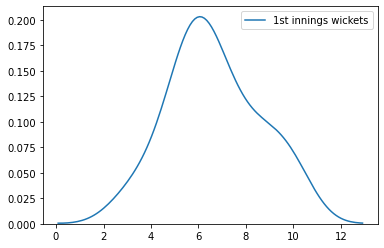

In [479]:
sns.kdeplot(first_innings["1st innings wickets"])

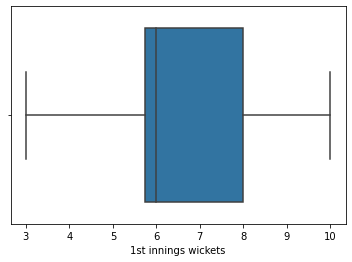

In [480]:
sns.boxplot(first_innings["1st innings wickets"])

In [481]:
print("Average no. of wicket fall in KKR VS RR matches in first innings :{}".format(round(first_innings["1st innings wickets"].mean())))

Average no. of wicket fall in KKR VS RR matches in first innings :7


Text(0.5, 1.0, 'Total Wickets in first Innings')

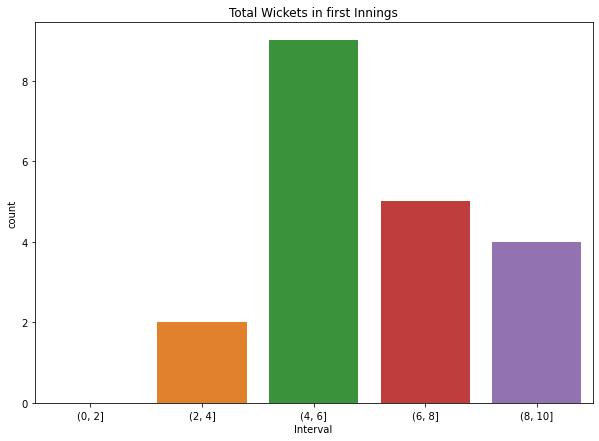

In [482]:
plt.figure(figsize=(10,7))
first_innings["Interval"] = pd.cut(first_innings["1st innings wickets"],[0,2,4,6,8,10])
sns.countplot(first_innings["Interval"])
plt.title("Total Wickets in first Innings")

- 2nd innings

In [483]:
second = RR_KKR[RR_KKR["inning"]==2]

In [484]:
second_innings = pd.DataFrame(second.groupby(["match_id","batting_team"])["player_dismissed"].count())

second_innings.columns =["2nd innings wickets"]

second_innings.reset_index(inplace = True)

print("2nd inning wicket fall :")

second_innings

2nd inning wicket fall :


,match_id,batting_team,2nd innings wickets
0,78,Kolkata Knight Riders,10
1,105,Rajasthan Royals,4
2,126,Kolkata Knight Riders,8
3,168,Kolkata Knight Riders,6
4,187,Kolkata Knight Riders,5
5,227,Kolkata Knight Riders,2
6,246,Kolkata Knight Riders,1
7,251,Kolkata Knight Riders,2
8,314,Kolkata Knight Riders,10
9,322,Kolkata Knight Riders,5


- Team-wise

In [485]:
team_wise = second_innings.groupby(["batting_team"]).agg({"batting_team":"count","2nd innings wickets":"sum"})

team_wise.columns = ["count","2nd innings wickets"]

print("Team wise wicket loss :")
team_wise

Team wise wicket loss :


,count,2nd innings wickets
batting_team,,
Kolkata Knight Riders,17,93
Rajasthan Royals,3,15


In [486]:
team_wise["per_match"] = round(team_wise["2nd innings wickets"]/team_wise["count"])

print("On an average, per match wicket fall for both the teams in second innings :")
team_wise

On an average, per match wicket fall for both the teams in second innings :


,count,2nd innings wickets,per_match
batting_team,,,
Kolkata Knight Riders,17,93,5.0
Rajasthan Royals,3,15,5.0


In [487]:
second_innings.describe().iloc[:,1:].T

,count,mean,std,min,25%,50%,75%,max
2nd innings wickets,20.0,5.4,2.998245,1.0,2.75,5.0,8.0,10.0


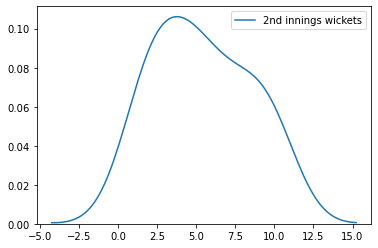

In [488]:
sns.kdeplot(second_innings["2nd innings wickets"])

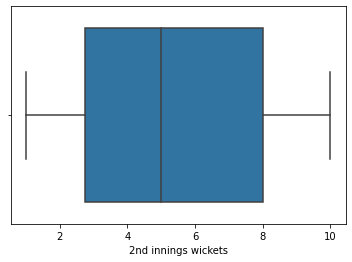

In [489]:
sns.boxplot(second_innings["2nd innings wickets"])

In [490]:
print("Average no. of wicket fall in KKR VS RR matches in 2nd innings  :{}".format(round(second_innings["2nd innings wickets"].mean())))

Average no. of wicket fall in KKR VS RR matches in 2nd innings  :5


Text(0.5, 1.0, 'Total Wickets in first Innings')

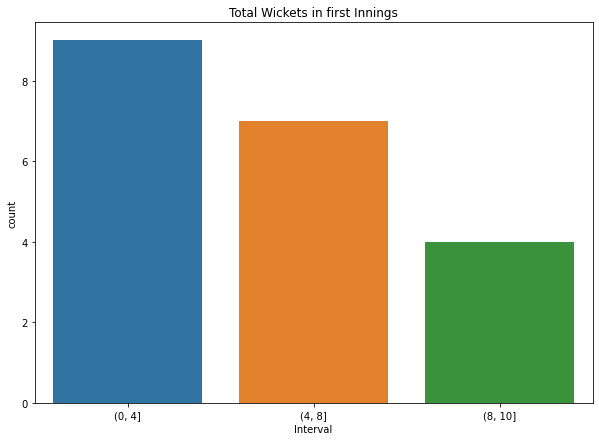

In [491]:
plt.figure(figsize=(10,7))
second_innings["Interval"] = pd.cut(second_innings["2nd innings wickets"],[0,4,8,10])
sns.countplot(second_innings["Interval"])
plt.title("Total Wickets in first Innings")

From all the above analysis of overall matches, inning-wise,match-wise etc we can predict that 10+ wickets are expected to fall in this match also.

## Player to have better ratio


In [492]:
def ratio(player_name,opposition):
    
    #batsman runs
    player = matches[(matches["bowling_team"]==opposition)&(matches["batsman"]==player_name)]

    player_runs= player[player["wide_runs"]==0]

    batsman_runs = player_runs.groupby(["match_id"]).agg({"batsman_runs":"sum","ball":"count"})
    
    #boundaries runs
    player_boundaries = player_runs[(player_runs["batsman_runs"]==4)|(player_runs["batsman_runs"]==6)]

    boundary_runs = pd.DataFrame(player_boundaries.groupby(["match_id"])["batsman_runs"].sum())

    boundary_runs.columns = ["boundary runs"]
    
    #runs by 1,2 and 3
    player_running = player_runs[(player_runs["batsman_runs"]==1)|(player_runs["batsman_runs"]==2)|(player_runs["batsman_runs"]==3)]

    batsman_running = pd.DataFrame(player_running.groupby(["match_id"])["batsman_runs"].sum())

    batsman_running.columns = ["running runs"]
    
    #merging the data together
    final = pd.merge(batsman_runs,boundary_runs, on = "match_id" , how = "outer")

    final = pd.merge(final,batsman_running,on="match_id",how = "outer")

    final["boundary runs"].fillna(0, inplace = True)

    final["running runs"].fillna(0, inplace = True)
    
    final=final[final["ball"]>10]
    print(final)
    print(" ")
    
    ratio = (final["boundary runs"]-final["running runs"]) / final["batsman_runs"]
    
    ratio_player = sum(ratio)/len(ratio)
    print("Ratio :",round(ratio_player,2))

- Ben Stokes

In [493]:
ratio("BA Stokes","Kolkata Knight Riders")

          batsman_runs  ball  boundary runs  running runs
match_id                                                 
40                  14    15            4.0            10
7908                14    11            6.0             8
7942                11    13            0.0            11
11312               10    14            0.0            10
 
Ratio : -0.64


- Nitish Rana

In [494]:
ratio("N Rana","Rajasthan Royals")

          batsman_runs  ball  boundary runs  running runs
match_id                                                 
7908                35    27           14.0            21
7942                21    17           14.0             7
11334               26    26           16.0            10
 
Ratio : 0.12


- Sanju Samson

In [495]:
ratio("SV Samson","Kolkata Knight Riders")

          batsman_runs  ball  boundary runs  running runs
match_id                                                 
18                  39    25             28            11
31                  60    38             34            26
427                 40    36             16            24
476                 20    19             16             4
482                 37    31             12            25
578                 15    13              8             7
602                 15    15              8             7
7951                50    38             28            22
11334               22    15             12            10
 
Ratio : 0.11


- Eoin Morgan

In [496]:
ratio("EJG Morgan","Rajasthan Royals")

          batsman_runs  ball  boundary runs  running runs
match_id                                                 
389                 51    38             30            21
529                 27    30             14            13
558                 63    28             46            17
 
Ratio : 0.22


- Steven Smith

In [497]:
ratio("SPD Smith","Kolkata Knight Riders")

          batsman_runs  ball  boundary runs  running runs
match_id                                                 
29                  51    37           22.0            29
353                 14    16            4.0            10
476                 24    14            8.0            16
570                 14    11            8.0             6
596                 31    28            8.0            23
11312               76    59           34.0            42
 
Ratio : -0.22


- Dinesh Karthik

In [498]:
ratio("KD Karthik","Rajasthan Royals")

          batsman_runs  ball  boundary runs  running runs
match_id                                                 
93                  13    15            4.0           9.0
115                 10    12            4.0           6.0
165                 23    11           10.0          13.0
180                 23    26            8.0          15.0
203                 69    38           48.0          21.0
256                 21    16           12.0           9.0
403                 30    32           12.0          18.0
447                 21    21           12.0           9.0
456                 22    17           12.0          10.0
480                 12    16            0.0          12.0
546                 27    18           18.0           9.0
7908                42    23           20.0          22.0
7942                42    31           26.0          16.0
7951                52    38           28.0          24.0
11334               99    50           82.0          17.0
 
Ratio : -0.0

- Shubman Gill

In [499]:
ratio("S Gill","Rajasthan Royals")

          batsman_runs  ball  boundary runs  running runs
match_id                                                 
7951                28    17             18            10
11334               14    14              8             6
 
Ratio : 0.21


- Andre Russell

In [500]:
ratio("AD Russell","Rajasthan Royals")

          batsman_runs  ball  boundary runs  running runs
match_id                                                 
570                 37    20           28.0             9
7951                50    25           42.0             8
11334               14    14            6.0             8
 
Ratio : 0.35


- Sunil Narine

In [501]:
ratio("SP Narine","Rajasthan Royals")

          batsman_runs  ball  boundary runs  running runs
match_id                                                 
7908                36    25           26.0          10.0
11312               50    25           42.0           8.0
 
Ratio : 0.56


- Robin Uthappa

In [502]:
ratio("RV Uthappa","Kolkata Knight Riders")

          batsman_runs  ball  boundary runs  running runs
match_id                                                 
75                  37    37           20.0            17
178                 20    17            4.0            16
217                 50    22           40.0            10
298                 12    19            4.0             8
353                 17    14            8.0             9
437                 31    35            8.0            23
445                 25    21           16.0             9
 
Ratio : -0.07


- Buttler

In [503]:
ratio("JC Buttler","Kolkata Knight Riders")

          batsman_runs  ball  boundary runs  running runs
match_id                                                 
7                   28    22             16            12
581                 41    22             30            11
600                 15    15              8             7
7908                25    18              8            17
7942                39    22             32             7
11312               38    34             26            12
 
Ratio : 0.22


So from the past performance of players against the opposition team we can predict that players like Naraine , Buttler , Russel(if he plays) have better chances to have higher ratio.

## Jofra Archer's Economy rate and Boundaries he will give away in his bowling spell 

- Against KKR

In [504]:
archer = RR_KKR[(RR_KKR["bowling_team"]=="Rajasthan Royals") &(RR_KKR["bowler"]=='J Archer')]
archer = archer[(archer["bye_runs"]==0) & (archer["legbye_runs"]==0)]
archer.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
161943,Kolkata Knight Riders,field,0,Kolkata Knight Riders,2,Kolkata Knight Riders,Rajasthan Royals,3,1,RV Uthappa,...,0,0,0,0,0,0,0,0,NaN,NaN
161944,Kolkata Knight Riders,field,0,Kolkata Knight Riders,2,Kolkata Knight Riders,Rajasthan Royals,3,2,RV Uthappa,...,0,0,0,0,0,0,0,0,NaN,NaN
161945,Kolkata Knight Riders,field,0,Kolkata Knight Riders,2,Kolkata Knight Riders,Rajasthan Royals,3,3,RV Uthappa,...,0,0,0,0,0,1,0,1,NaN,NaN
161946,Kolkata Knight Riders,field,0,Kolkata Knight Riders,2,Kolkata Knight Riders,Rajasthan Royals,3,4,CA Lynn,...,0,0,0,0,0,6,0,6,NaN,NaN
161947,Kolkata Knight Riders,field,0,Kolkata Knight Riders,2,Kolkata Knight Riders,Rajasthan Royals,3,5,CA Lynn,...,0,0,0,0,0,4,0,4,NaN,NaN


In [505]:
economy = archer.groupby(["season","match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique' , 'player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for Archer against KKR :")

economy

Bowling stats for Archer against KKR :


runs given  over  wickets taken
season match_id bowler                                   
2018   7942     J Archer          43     4              0
       7951     J Archer          33     4              2
2019   11312    J Archer          14     3              0
       11334    J Archer          28     4              1

In [506]:
economy["economy rate"] = economy['runs given']/economy["over"]

print("Economy Rate of Archer while bowling against KKR :")

economy

Economy Rate of Archer while bowling against KKR :


runs given  over  wickets taken  economy rate
season match_id bowler                                                 
2018   7942     J Archer          43     4              0     10.750000
       7951     J Archer          33     4              2      8.250000
2019   11312    J Archer          14     3              0      4.666667
       11334    J Archer          28     4              1      7.000000

In [507]:
archer_boundaries = archer[(archer["batsman_runs"]==4)|(archer["batsman_runs"]==6)]

boundary_runs = pd.DataFrame(archer_boundaries.groupby(["match_id"])["batsman_runs"].count())

boundary_runs.columns = ["boundary"]

economy = pd.merge(economy,boundary_runs,on = "match_id",how="inner")

print("Archer stats :")

economy

Archer stats :


,runs given,over,wickets taken,economy rate,boundary
match_id,,,,,
7942,43,4,0,10.750000,8
7951,33,4,2,8.250000,4
11312,14,3,0,4.666667,2
11334,28,4,1,7.000000,3


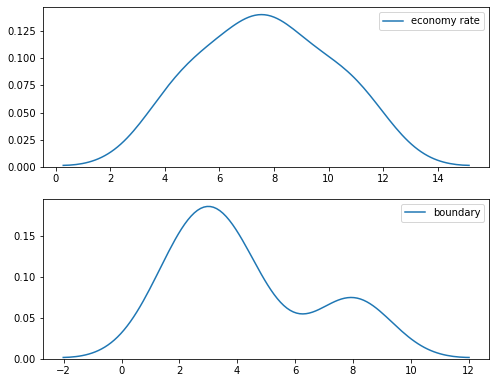

In [508]:
plt.figure(figsize = (8,10))
plt.subplot(3,1,1)
sns.kdeplot(economy["economy rate"])
plt.subplot(3,1,2)
sns.kdeplot(economy["boundary"])

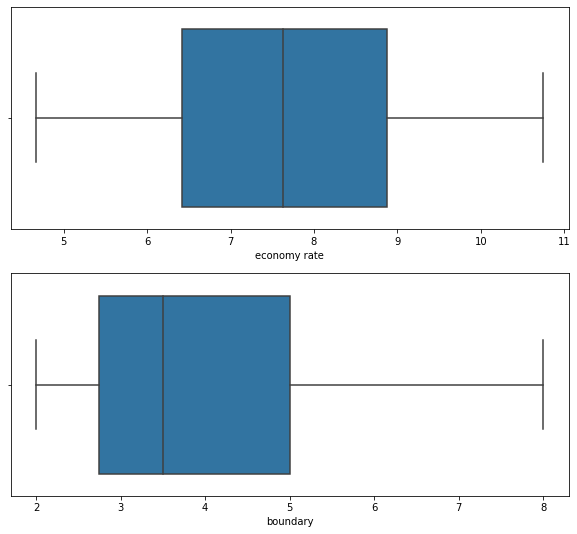

In [509]:
plt.figure(figsize = (10,9))
plt.subplot(2,1,1)
sns.boxplot(economy["economy rate"])
plt.subplot(2,1,2)
sns.boxplot(economy["boundary"])

In [510]:
economy.describe().iloc[:,4:].T

,count,mean,std,min,25%,50%,75%,max
boundary,4.0,4.25,2.629956,2.0,2.75,3.5,5.0,8.0


In [511]:
economy.describe().iloc[:,3:4].T

,count,mean,std,min,25%,50%,75%,max
economy rate,4.0,7.666667,2.535854,4.666667,6.416667,7.625,8.875,10.75


In [512]:
print("Average economy rate of Archer while bowling against KKR :",round(economy["economy rate"].mean()))

Average economy rate of Archer while bowling against KKR : 8


In [513]:
print("Average no of boundaries given by Archer while bowling against KKR :",round(economy["boundary"].mean()))

Average no of boundaries given by Archer while bowling against KKR : 4


- Overall

In [514]:
archer_overall = matches[(matches["bowling_team"]=="Rajasthan Royals") &(matches["bowler"]=='J Archer')]
archer_overall = archer_overall[(archer_overall["bye_runs"]==0) & (archer_overall["legbye_runs"]==0)]
archer_overall.iloc[:,6:].head()

,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
155173,0,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,4,2,Ishan Kishan,AS Yadav,J Archer,0,0,0,0,0,0,0,0,NaN,NaN
155174,0,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,4,3,Ishan Kishan,AS Yadav,J Archer,0,0,0,0,0,1,0,1,NaN,NaN
155175,0,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,4,4,AS Yadav,Ishan Kishan,J Archer,0,0,0,0,0,0,0,0,NaN,NaN
155176,0,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,4,5,AS Yadav,Ishan Kishan,J Archer,0,0,0,0,0,4,0,4,NaN,NaN
155177,0,Rajasthan Royals,1,Mumbai Indians,Rajasthan Royals,4,6,AS Yadav,Ishan Kishan,J Archer,0,0,0,0,0,0,0,0,NaN,NaN


In [515]:
economy_overall = archer_overall.groupby(["season","match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique', 'player_dismissed':'count'})

economy_overall.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for Archer (overall) :")

economy_overall

Bowling stats for Archer (overall) :


runs given  over  wickets taken
season match_id bowler                                   
2018   7914     J Archer          22     4              3
       7921     J Archer          26     4              3
       7925     J Archer          31     4              1
       7931     J Archer          43     4              1
       7933     J Archer          32     4              1
       7936     J Archer          42     4              2
       7940     J Archer          16     4              2
       7942     J Archer          43     4              0
       7946     J Archer          37     4              0
       7951     J Archer          33     4              2
2019   11140    J Archer          17     4              0
       11144    J Archer          46     4              0
       11148    J Archer          17     4              2
       11150    J Archer          47     4              1
       11312    J Archer          14     3              0
       11316    J Archer          19     4              1
       11318    J Archer          39     4              3
       11323    J Archer          18     4              3
       11327    J Archer          22     4              1
       11331    J Archer          31     4              0
       11334    J Archer          28     4              1

In [516]:
economy_overall["economy rate"] = economy_overall['runs given']/economy_overall["over"]

print("Economy Rate of Archer (overall) :")

economy_overall

Economy Rate of Archer (overall) :


runs given  over  wickets taken  economy rate
season match_id bowler                                                 
2018   7914     J Archer          22     4              3      5.500000
       7921     J Archer          26     4              3      6.500000
       7925     J Archer          31     4              1      7.750000
       7931     J Archer          43     4              1     10.750000
       7933     J Archer          32     4              1      8.000000
       7936     J Archer          42     4              2     10.500000
       7940     J Archer          16     4              2      4.000000
       7942     J Archer          43     4              0     10.750000
       7946     J Archer          37     4              0      9.250000
       7951     J Archer          33     4              2      8.250000
2019   11140    J Archer          17     4              0      4.250000
       11144    J Archer          46     4              0     11.500000
       11148    J Archer          17     4              2      4.250000
       11150    J Archer          47     4              1     11.750000
       11312    J Archer          14     3              0      4.666667
       11316    J Archer          19     4              1      4.750000
       11318    J Archer          39     4              3      9.750000
       11323    J Archer          18     4              3      4.500000
       11327    J Archer          22     4              1      5.500000
       11331    J Archer          31     4              0      7.750000
       11334    J Archer          28     4              1      7.000000

In [517]:
archer_boundaries_overall = archer_overall[(archer_overall["batsman_runs"]==4)|(archer_overall["batsman_runs"]==6)]

boundary_runs_overall = pd.DataFrame(archer_boundaries_overall.groupby(["match_id"])["batsman_runs"].count())

boundary_runs_overall.columns = ["boundary"]

economy_overall = pd.merge(economy_overall,boundary_runs_overall,on = "match_id",how="inner")

print("Archer stats (overall) :")

economy_overall

Archer stats (overall) :


,runs given,over,wickets taken,economy rate,boundary
match_id,,,,,
7914,22,4,3,5.500000,3
7921,26,4,3,6.500000,3
7925,31,4,1,7.750000,5
7931,43,4,1,10.750000,6
7933,32,4,1,8.000000,4
7936,42,4,2,10.500000,4
7942,43,4,0,10.750000,8
7946,37,4,0,9.250000,6
7951,33,4,2,8.250000,4


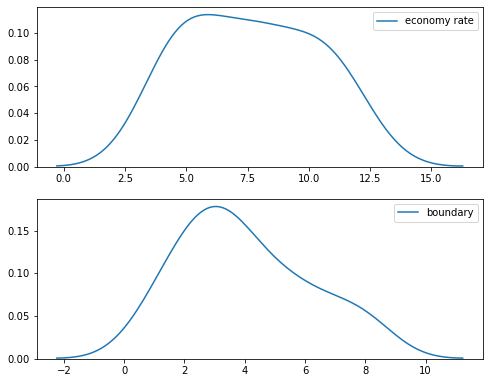

In [518]:
plt.figure(figsize = (8,10))
plt.subplot(3,1,1)
sns.kdeplot(economy_overall["economy rate"])
plt.subplot(3,1,2)
sns.kdeplot(economy_overall["boundary"])

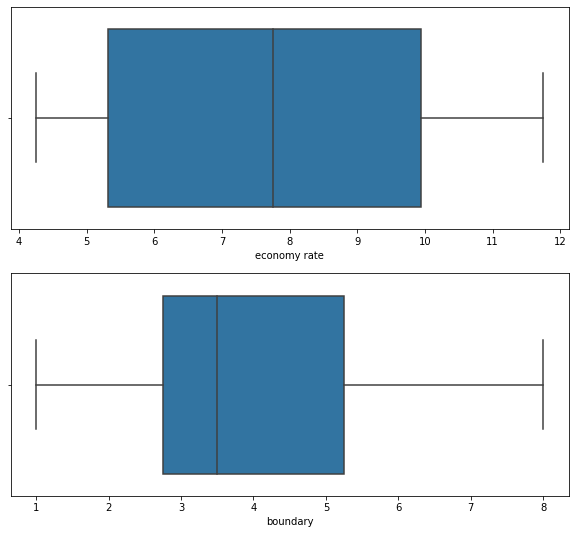

In [519]:
plt.figure(figsize = (10,9))
plt.subplot(2,1,1)
sns.boxplot(economy_overall["economy rate"])
plt.subplot(2,1,2)
sns.boxplot(economy_overall["boundary"])

In [520]:
economy_overall.describe().iloc[:,4:].T

,count,mean,std,min,25%,50%,75%,max
boundary,20.0,4.0,2.127514,1.0,2.75,3.5,5.25,8.0


In [521]:
economy_overall.describe().iloc[:,3:4].T

,count,mean,std,min,25%,50%,75%,max
economy rate,20.0,7.645833,2.593412,4.25,5.3125,7.75,9.9375,11.75


In [522]:
print("Average economy rate of Archer (overall) :",round(economy_overall["economy rate"].mean()))

Average economy rate of Archer (overall) : 8


In [523]:
print("Average no of boundaries given by Archer (overall) :",round(economy_overall["boundary"].mean()))

Average no of boundaries given by Archer (overall) : 4


Text(0.5, 1.0, 'Boundaries')

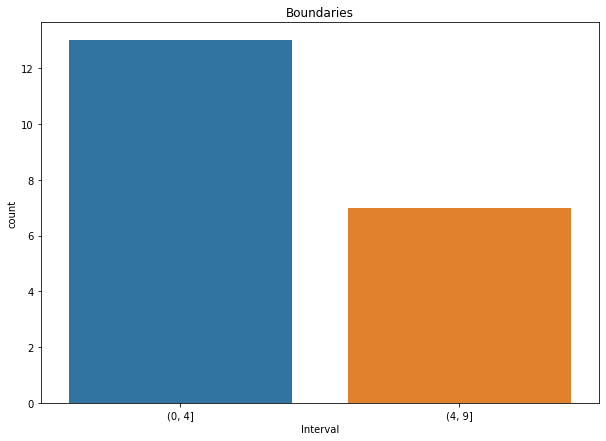

In [524]:
plt.figure(figsize=(10,7))
economy_overall["Interval"] = pd.cut(economy_overall["boundary"],[0,4,9])
sns.countplot(economy_overall["Interval"])
plt.title("Boundaries")

Text(0.5, 1.0, 'Economy Rate')

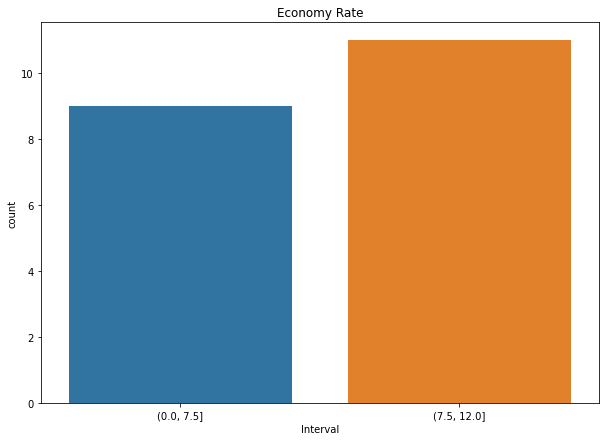

In [525]:
plt.figure(figsize=(10,7))
economy_overall["Interval"] = pd.cut(economy_overall["economy rate"],[0,7.5,12])
sns.countplot(economy_overall["Interval"])
plt.title("Economy Rate")

From all the above analysis against KKR and overall also and from plots also we can see that generally Archer's economy lies between 6-9 and the boundaries in his over are showing a trend for less then 4. So, for this match we can predict that Archer's economy is expected to be greater then 7 and the boundaries are expected to be less then 4.

## No of bowlers in the match to have economy rate less the 8

- Kolkata Knight Riders

In [526]:
kkr = RR_KKR[RR_KKR["bowling_team"]=="Kolkata Knight Riders"]
kkr = kkr[(kkr["season"]==2015) | (kkr["season"]==2018) | (kkr["season"]==2019)]
kkr = kkr[(kkr["bye_runs"]==0) & (kkr["legbye_runs"]==0)]
kkr.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
134780,Rajasthan Royals,bat,0,Rajasthan Royals,1,Rajasthan Royals,Kolkata Knight Riders,1,1,AM Rahane,...,0,0,0,0,0,1,0,1,NaN,NaN
134781,Rajasthan Royals,bat,0,Rajasthan Royals,1,Rajasthan Royals,Kolkata Knight Riders,1,2,SR Watson,...,0,0,0,0,0,0,0,0,NaN,NaN
134782,Rajasthan Royals,bat,0,Rajasthan Royals,1,Rajasthan Royals,Kolkata Knight Riders,1,3,SR Watson,...,0,0,0,0,0,0,0,0,NaN,NaN
134783,Rajasthan Royals,bat,0,Rajasthan Royals,1,Rajasthan Royals,Kolkata Knight Riders,1,4,SR Watson,...,0,0,0,0,0,4,0,4,NaN,NaN
134784,Rajasthan Royals,bat,0,Rajasthan Royals,1,Rajasthan Royals,Kolkata Knight Riders,1,5,SR Watson,...,0,0,0,0,0,4,0,4,NaN,NaN


In [527]:
kkr.season.unique()

array([2015, 2018, 2019], dtype=int64)

In [528]:
economy = kkr.groupby(["season","match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique', 'player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for KKR Bowlers against RR :")

economy.tail(10)

Bowling stats for KKR Bowlers against RR :


runs given  over  wickets taken
season match_id bowler                                        
2019   11312    P Krishna              35     4              1
                PP Chawla              19     4              0
                SP Narine              22     4              0
       11334    AD Russell             32     3              1
                CR Brathwaite          16     2              0
                N Rana                 13     1              0
                P Krishna              43     4              1
                P Raj                  28     2              0
                PP Chawla              20     4              3
                SP Narine              25     4              2

In [529]:
economy["economy rate"] = round((economy['runs given']/economy["over"]),2)

print("Economy Rate of KKR Bowlers while bowling against RR :")

economy

Economy Rate of KKR Bowlers while bowling against RR :


runs given  over  wickets taken  economy rate
season match_id bowler                                                        
2015   570      AD Russell               32     4              3          8.00
                Azhar Mahmood            39     3              1         13.00
                M Morkel                 37     4              0          9.25
                PP Chawla                10     1              0         10.00
                Shakib Al Hasan          35     4              0          8.75
                UT Yadav                 36     4              2          9.00
2018   7908     Kuldeep Yadav            23     4              1          5.75
                N Rana                   11     2              2          5.50
                PP Chawla                18     4              1          4.50
                S Mavi                   40     4              2         10.00
                SP Narine                48     4              0         12.00
                T Curran                 19     2              2          9.50
       7942     AD Russell               13     3              2          4.33
                Kuldeep Yadav            20     4              4          5.00
                P Krishna                35     4              2          8.75
                S Mavi                   44     4              1         11.00
                SP Narine                29     4              1          7.25
       7951     AD Russell               22     3              0          7.33
                J Searles                13     1              0         13.00
                Kuldeep Yadav            18     4              1          4.50
                P Krishna                28     4              1          7.00
                PP Chawla                24     4              2          6.00
                SP Narine                39     4              0          9.75
2019   11312    H Gurney                 25     4              2          6.25
                Kuldeep Yadav            33     4              0          8.25
                P Krishna                35     4              1          8.75
                PP Chawla                19     4              0          4.75
                SP Narine                22     4              0          5.50
       11334    AD Russell               32     3              1         10.67
                CR Brathwaite            16     2              0          8.00
                N Rana                   13     1              0         13.00
                P Krishna                43     4              1         10.75
                P Raj                    28     2              0         14.00
                PP Chawla                20     4              3          5.00
                SP Narine                25     4              2          6.25

- Over greater then 1 and economy less then 8

In [530]:
economy = economy[economy["over"]>1]

economy = economy[economy["economy rate"]<8]

economy.reset_index(inplace = True)

print("KKR Bowlers with economy rate less then 8: ")

economy

KKR Bowlers with economy rate less then 8: 


,season,match_id,bowler,runs given,over,wickets taken,economy rate
0,2018,7908,Kuldeep Yadav,23,4,1,5.75
1,2018,7908,N Rana,11,2,2,5.50
2,2018,7908,PP Chawla,18,4,1,4.50
3,2018,7942,AD Russell,13,3,2,4.33
4,2018,7942,Kuldeep Yadav,20,4,4,5.00
5,2018,7942,SP Narine,29,4,1,7.25
6,2018,7951,AD Russell,22,3,0,7.33
7,2018,7951,Kuldeep Yadav,18,4,1,4.50
8,2018,7951,P Krishna,28,4,1,7.00
9,2018,7951,PP Chawla,24,4,2,6.00


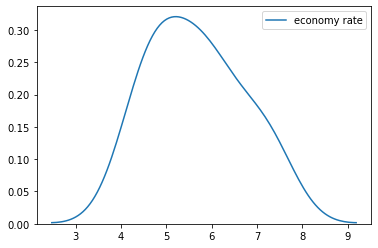

In [531]:
sns.kdeplot(economy["economy rate"])

Text(0, 0.5, 'Count')

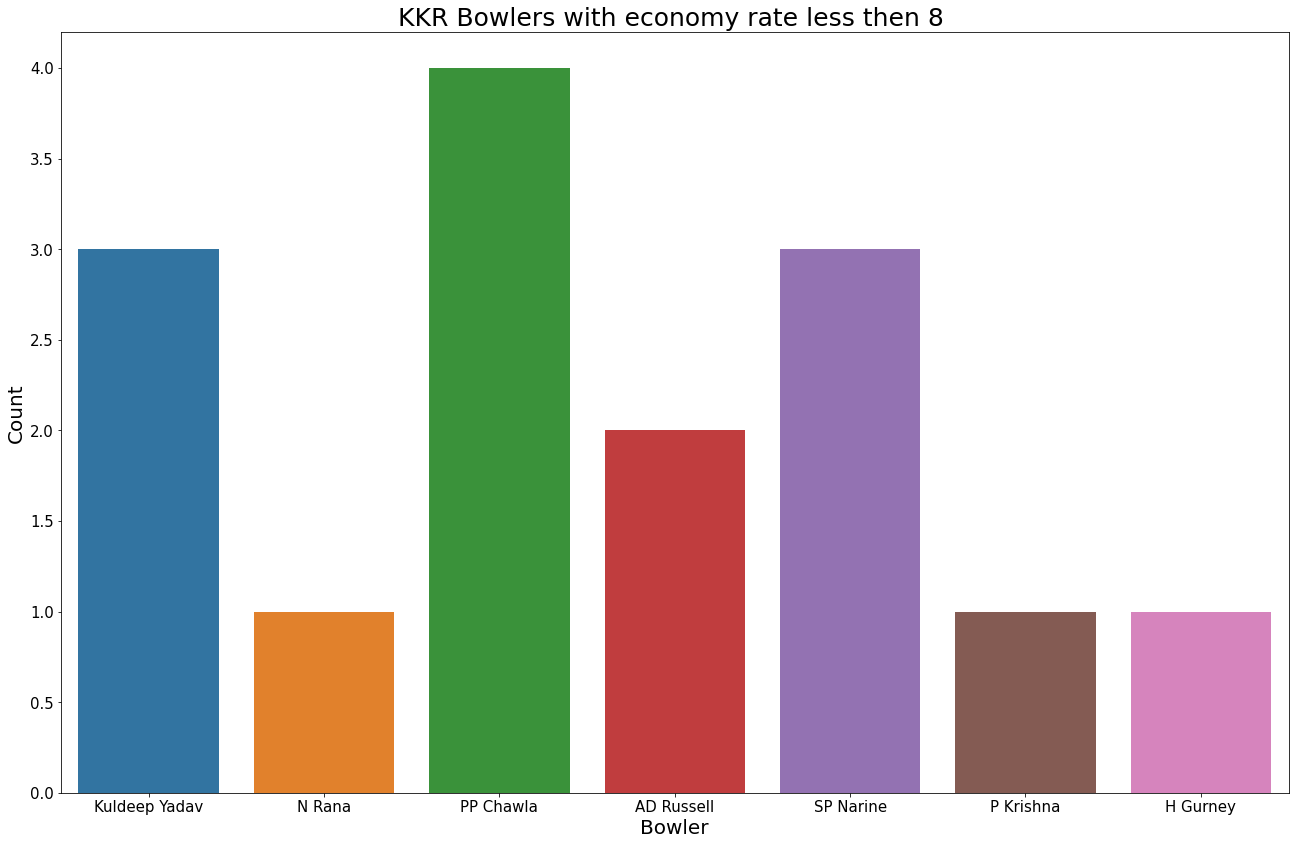

In [532]:
plt.figure(figsize = (22,14))
sns.countplot(economy["bowler"])
plt.title("KKR Bowlers with economy rate less then 8 ",fontsize = 25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Bowler',fontsize=20)
plt.ylabel('Count',fontsize=20)

- Rajasthan Royals

In [533]:
rr = RR_KKR[RR_KKR["bowling_team"]=="Rajasthan Royals"]
rr = rr[(rr["season"]==2015) | (rr["season"]==2018) | (rr["season"]==2019)]
rr = rr[(rr["bye_runs"]==0) & (rr["legbye_runs"]==0)]
rr.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
134905,Rajasthan Royals,bat,0,Rajasthan Royals,2,Kolkata Knight Riders,Rajasthan Royals,1,1,RV Uthappa,...,0,0,0,0,0,0,0,0,NaN,NaN
134906,Rajasthan Royals,bat,0,Rajasthan Royals,2,Kolkata Knight Riders,Rajasthan Royals,1,2,RV Uthappa,...,2,0,0,0,0,0,2,2,NaN,NaN
134907,Rajasthan Royals,bat,0,Rajasthan Royals,2,Kolkata Knight Riders,Rajasthan Royals,1,3,G Gambhir,...,0,0,0,0,0,0,0,0,NaN,NaN
134908,Rajasthan Royals,bat,0,Rajasthan Royals,2,Kolkata Knight Riders,Rajasthan Royals,1,4,G Gambhir,...,0,0,0,0,0,1,0,1,NaN,NaN
134909,Rajasthan Royals,bat,0,Rajasthan Royals,2,Kolkata Knight Riders,Rajasthan Royals,1,5,RV Uthappa,...,0,0,0,0,0,4,0,4,NaN,NaN


In [534]:
rr.season.unique()

array([2015, 2018, 2019], dtype=int64)

In [535]:
economy = rr.groupby(["season","match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique', 'player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for RR Bowlers against KKR :")

economy.tail(10)

Bowling stats for RR Bowlers against KKR :


runs given  over  wickets taken
season match_id bowler                                     
2019   11312    J Archer            14     3              0
                K Gowtham           22     1              0
                S Gopal             35     4              2
                S Midhun            27     2              0
       11334    J Archer            28     4              1
                JD Unadkat          50     4              1
                O Thomas            32     4              1
                R Parag              7     1              0
                S Gopal             31     3              1
                VR Aaron            20     4              2

In [536]:
economy["economy rate"] = round((economy['runs given']/economy["over"]),2)

print("Economy Rate of RR Bowlers while bowling against KKR :")

economy

Economy Rate of RR Bowlers while bowling against KKR :


runs given  over  wickets taken  economy rate
season match_id bowler                                                      
2015   570      BB Sran                29     3              0          9.67
                CH Morris              20     4              4          5.00
                DS Kulkarni            31     4              2          7.75
                JP Faulkner            41     4              1         10.25
                SR Watson              33     4              2          8.25
                STR Binny              10     1              0         10.00
2018   7908     B Laughlin             37     4              0          9.25
                BA Stokes              25     3              0          8.33
                DS Kulkarni            20     2              0         10.00
                JD Unadkat             34     3              0         11.33
                K Gowtham              23     4              2          5.75
                S Gopal                23     3              1          7.67
       7942     Anureet Singh          10     1              0         10.00
                BA Stokes              15     4              3          3.75
                I Sodhi                21     4              1          5.25
                J Archer               43     4              0         10.75
                JD Unadkat             23     3              0          7.67
                K Gowtham              32     2              0         16.00
       7951     B Laughlin             35     3              2         11.67
                I Sodhi                15     4              0          3.75
                J Archer               33     4              2          8.25
                JD Unadkat             33     2              0         16.50
                K Gowtham              15     3              2          5.00
                S Gopal                34     4              1          8.50
2019   11312    BA Stokes               3     1              0          3.00
                DS Kulkarni            31     3              0         10.33
                J Archer               14     3              0          4.67
                K Gowtham              22     1              0         22.00
                S Gopal                35     4              2          8.75
                S Midhun               27     2              0         13.50
       11334    J Archer               28     4              1          7.00
                JD Unadkat             50     4              1         12.50
                O Thomas               32     4              1          8.00
                R Parag                 7     1              0          7.00
                S Gopal                31     3              1         10.33
                VR Aaron               20     4              2          5.00

- Over greater then 1 and economy less then 8

In [537]:
economy = economy[economy["over"]>1]

economy = economy[economy["economy rate"]<8]

economy.reset_index(inplace = True)

print("RR Bowlers with economy rate less then 8: ")

economy

RR Bowlers with economy rate less then 8: 


,season,match_id,bowler,runs given,over,wickets taken,economy rate
0,2015,570,CH Morris,20,4,4,5.00
1,2015,570,DS Kulkarni,31,4,2,7.75
2,2018,7908,K Gowtham,23,4,2,5.75
3,2018,7908,S Gopal,23,3,1,7.67
4,2018,7942,BA Stokes,15,4,3,3.75
5,2018,7942,I Sodhi,21,4,1,5.25
6,2018,7942,JD Unadkat,23,3,0,7.67
7,2018,7951,I Sodhi,15,4,0,3.75
8,2018,7951,K Gowtham,15,3,2,5.00
9,2019,11312,J Archer,14,3,0,4.67


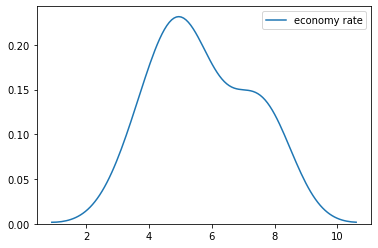

In [538]:
sns.kdeplot(economy["economy rate"])

Text(0, 0.5, 'Count')

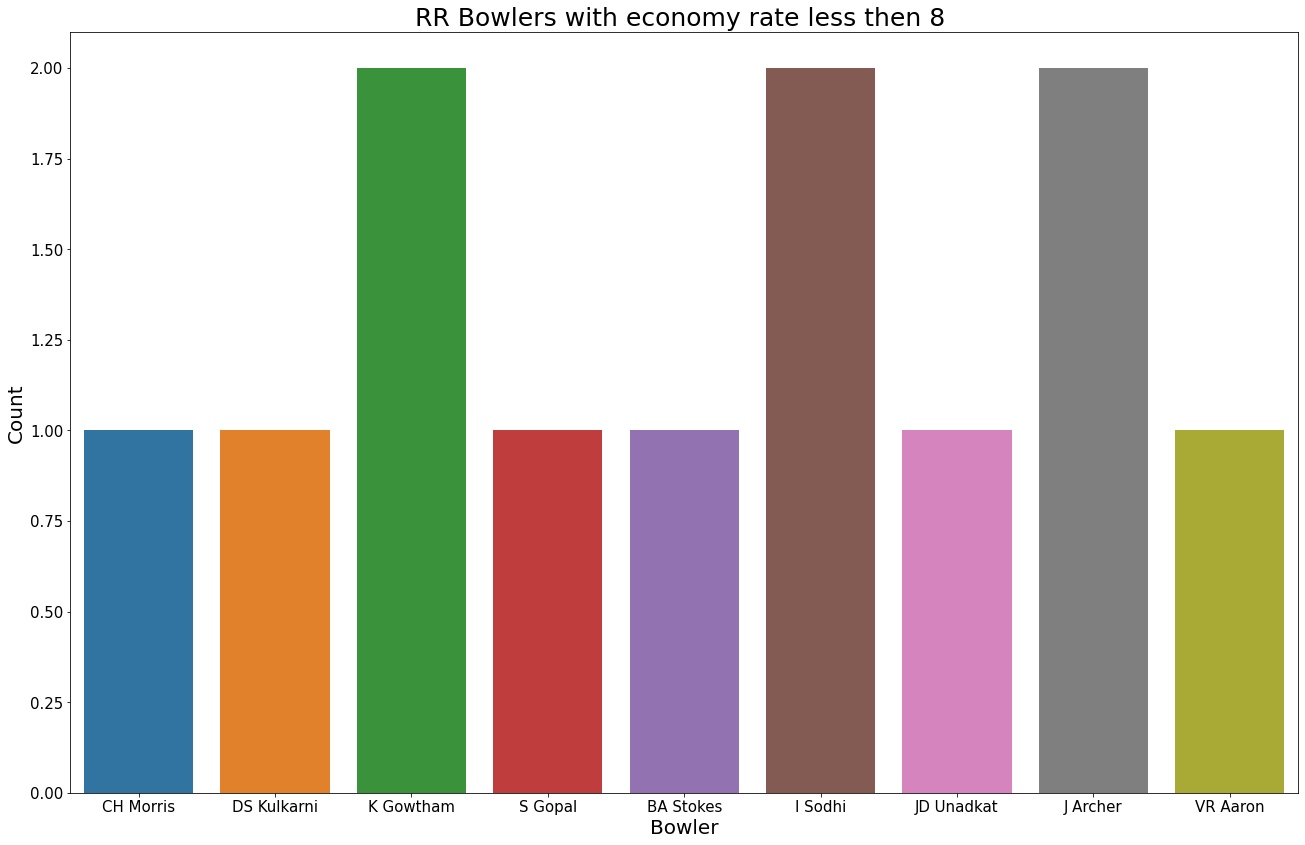

In [539]:
plt.figure(figsize = (22,14))
sns.countplot(economy["bowler"])
plt.title("RR Bowlers with economy rate less then 8 ",fontsize = 25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Bowler',fontsize=20)
plt.ylabel('Count',fontsize=20)

From all the above analysis of bowler's from both the team, we can predict that 3+ bowler have shown consistency over the years. So in this match also we expect around 3-5 bowlers can have economy less then 8.